# SKlearn tutorial

*Inspired by [Scikit\-learn Crash Course \- Machine Learning Library for Python \- YouTube](https://www.youtube.com/watch?v=0B5eIE_1vpU "Scikit\-learn Crash Course \- Machine Learning Library for Python \- YouTube")*

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Block for notebook runs
from dc2_python_utils.python_utils_ds.utils_plotting import make_plot
from dc2_python_utils.python_utils_ds.utils_sklearn import get_sklearn_dataset

## Main processing blocks

In [3]:
# Get input data frame and x y
housing_ames_df = get_sklearn_dataset(dataset="california",as_pandas=True).frame
housing_ames_xy = get_sklearn_dataset(dataset="california", return_xy=True)
X, y = housing_ames_xy
feature_names_str = '\n===\n'+'\n'.join(get_sklearn_dataset(dataset='california').feature_names)
target_names_str = '\n===\n'+'\n'.join(get_sklearn_dataset(dataset='california').target_names)
print(f"X column keys: {feature_names_str}\n\nSample - {X[:3]}\n")
print(f"y column keys: {target_names_str}\n\nSample - {y[:3]}\n\n")

housing_ames_df.head()

X column keys: 
===
MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude

Sample - [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]

y column keys: 
===
MedHouseVal

Sample - [4.526 3.585 3.521]




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Notice above, that there might be some useful features that might correlate well with `MedHouseVal` target, e.g.:
- `HouseAge`
- `AveRooms`

However, some points of preprocessing can be made here. E.g.
- Scaling features when using clustering methods such as `KNN` so that 

In [4]:
# Analyse y data
values, counts = np.unique(y, return_counts=True)

print(f"Unique values - {values}\n")
print(pd.Series(y).describe().round(2))

Unique values - [0.14999 0.175   0.225   ... 4.991   5.      5.00001]

count    20640.00
mean         2.07
std          1.15
min          0.15
25%          1.20
50%          1.80
75%          2.65
max          5.00
dtype: float64


In [5]:
# Define and fit models (already fitted)
model_knn = KNeighborsRegressor().fit(X, y)
model_lr = LinearRegression().fit(X, y)

# Predict models
pred_knn = model_knn.predict(X)
pred_lr = model_lr.predict(X)
print(pred_knn[:5])
print(pred_lr[:5])

[2.826802 2.1594   3.650404 2.3458   3.171602]
[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


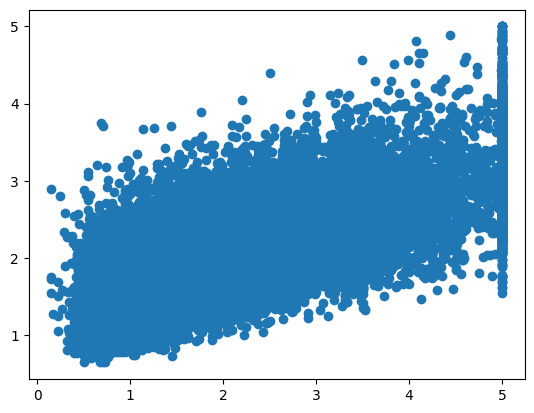

In [6]:
# Plot prediction values - knn
make_plot(x=y, y=pred_knn, method="scatter")

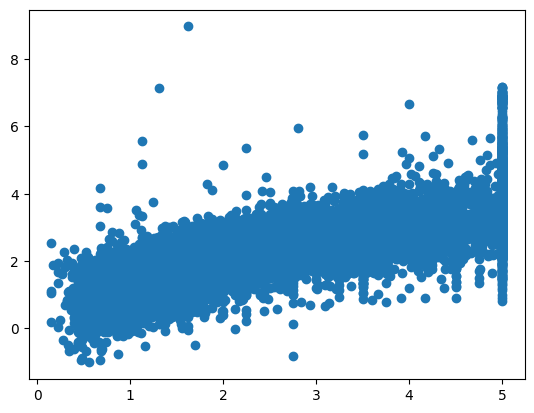

In [7]:
# Plot prediction values - lr
make_plot(x=y, y=pred_lr, method="scatter")